In [1]:
%%capture
%pip install -qU face-alignment torch_snippets

In [2]:
import face_alignment
from torch_snippets import read, show

In [3]:
!wget -q https://www.dropbox.com/s/lpw10qawsc5ipbn/MyImage.JPG -O MyImage.jpg

In [4]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.TWO_D, flip_input=False, device='cpu')

Downloading: "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" to /root/.cache/torch/hub/checkpoints/s3fd-619a316812.pth
100%|██████████| 85.7M/85.7M [00:03<00:00, 23.7MB/s]
Downloading: "https://www.adrianbulat.com/downloads/python-fan/2DFAN4-cd938726ad.zip" to /root/.cache/torch/hub/checkpoints/2DFAN4-cd938726ad.zip
100%|██████████| 91.9M/91.9M [00:03<00:00, 24.5MB/s]


In [5]:
input = read('MyImage.jpg', 1)
preds = fa.get_landmarks(input)[0]
print(preds.shape)

(68, 2)


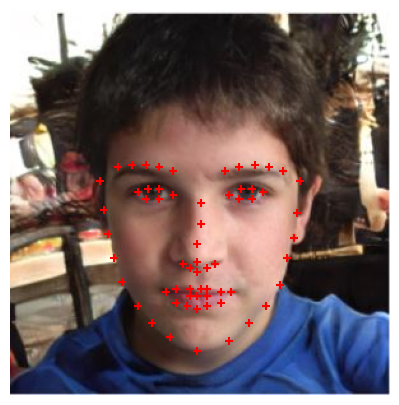

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(figsize=(5,5))
show(read('MyImage.jpg',1), ax=ax)
ax.scatter(preds[:,0], preds[:,1], marker='+', c='r')
plt.show()

In [8]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.THREE_D, flip_input=False, device='cpu')
input = read('MyImage.jpg', 1)
preds = fa.get_landmarks(input)[0]
import pandas as pd
df = pd.DataFrame(preds)
df.columns = ['x','y','z']
import plotly.express as px
fig = px.scatter_3d(df, x = 'x', y = 'y', z = 'z')
fig.show()

Downloading: "https://www.adrianbulat.com/downloads/python-fan/3DFAN4-4a694010b9.zip" to /root/.cache/torch/hub/checkpoints/3DFAN4-4a694010b9.zip
100%|██████████| 91.9M/91.9M [00:04<00:00, 23.2MB/s]
Downloading: "https://www.adrianbulat.com/downloads/python-fan/depth-6c4283c0e0.zip" to /root/.cache/torch/hub/checkpoints/depth-6c4283c0e0.zip
100%|██████████| 224M/224M [00:08<00:00, 27.8MB/s]
